In [ ]:
#Analysis of simulated data of a pulled alpha-helix

#Import the relevant libraries

import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

#Decide wich simulation we want to work with. We have 4 at different speeds 

#TRAJECTORIES: pull_1.xtc, pull_01.xtc, pull_001.xtc, pull_0001.xtc
#TOPOLOGIES: pull-v-0-1.tpr, pull-v-0-01.tpr, pull-v-0-001.tpr, pull-v-0-0001.tpr

#Note that we have modified the trajectory files to center the protein

filename = 'pull_1.xtc'
top = 'pull-v-0-1.tpr'


In [120]:
#With mda.Universe we load .xtc trajectories 

u = mda.Universe(top,filename)

In [48]:
#We want to compute and plot the radius of gyration vs time.

#Select protein atoms

pro = u.select_atoms("protein")

#compute radius of gyration

radius_g = []
times = []
for ts in u.trajectory:
    times.append(ts.time)
    radius_g.append(pro.radius_of_gyration())

times=np.array(times)
radius_g=np.array(radius_g)

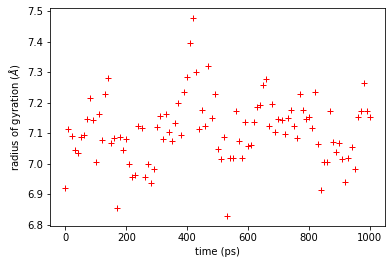

In [46]:
#Plot radius of gyration vs time

ax=plt.plot(times, radius_g,'r+')
plt.xlabel('time (ps)')
plt.ylabel('radius of gyration ($\AA$)')
plt.savefig('rog_1.png') #change the file name according to the velocity of pulling

In [57]:
#Get information on residues

list(pro.residues)


[<Residue LEU, 0>,
 <Residue GLN, 1>,
 <Residue LYS, 2>,
 <Residue TRP, 3>,
 <Residue GLN, 4>,
 <Residue GLN, 5>,
 <Residue PHE, 6>,
 <Residue ASN, 7>,
 <Residue SER, 8>,
 <Residue ASP, 9>,
 <Residue LEU, 10>,
 <Residue ASN, 11>,
 <Residue SER, 12>]

In [121]:
#Now we compute histograms of the CA end-to-end distance

#Select the CA atoms

ca_start=u.select_atoms('protein and resid 0 and name CA')
ca_end=u.select_atoms('protein and resid 12 and name CA')


#Compute distance for evey frame
dist = []
times = []
for ts in u.trajectory:
    #Get positions
    A = ca_start.positions
    B = ca_end.positions
    #Compute distance
    dist.append(np.linalg.norm(B-A))

dist=np.array(dist)

print(dist.shape)

(11,)


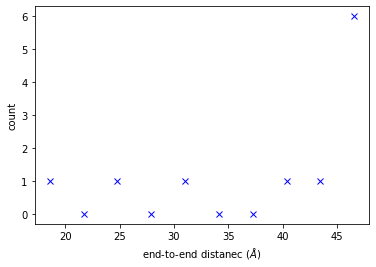

In [126]:
#Plot an histogram for the distances

histo=np.histogram(dist,bins=10)

x = []
for i in range(len(histo[0])):
    x.append((histo[1][i+1]+histo[1][i])/2)

plt.plot(x,histo[0],'bx')
plt.xlabel('end-to-end distanec ($\AA$)')
plt.ylabel('count')
plt.savefig('CA_dist_1.png') #change the file name according to the velocity of pulling

In [129]:
#We want to compute the mean distance 

mean = np.mean(dist)
